In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [118]:
# Abrir el archivo de log y leer todas las líneas
with open('wpsSimulator.log', 'r') as f:
    lines = f.readlines()

# Filtrar las líneas que contienen "PeasantFamilyBDIAgentBelieves"
filtered_lines = [line for line in lines if "PeasantFamilyBDIAgentBelieves" in line]

# Crear una lista de diccionarios a partir de las líneas filtradas
data = []
for line in filtered_lines:
    # Asume que cada dato en una línea está separado por un espacio
    items = line.split()
    row_dict = {}
    for item in items:
        # Si el item contiene "=", dividir en clave y valor
        if "=" in item:
            # Solo dividir en la primera aparición de '='
            parts = item.split('=', 1)
            key = parts[0]
            # Eliminar posibles comas al final del valor
            value = parts[1].rstrip(',')
            row_dict[key] = value
    data.append(row_dict)

# Crear un DataFrame de Pandas a partir de la lista de diccionarios
df = pd.DataFrame(data)

In [119]:
# Cambiar el nombre de la columna
df = df.rename(columns={'PeasantFamilyBDIAgentBelieves{peasantProfile': 'peasantProfile'})
# Limpia las columnas vacias
df = df.dropna(subset=['peasantProfile'])

In [120]:
df.head()

,peasantProfile,peasantEmotionalState,currentSeason,currentCropCare,roberyAccount,ptwDate,currentMoneyOrigin,currentPeasantActivityType,currentPeasantLeisureType,currentResourceNeededType,...,leisureOptions,sellDone,waterAvailable,pesticidesAvailable,supplies,riceSeedsByHectare,harvestedWeight,startRiceSeason,endRiceSeason,currentCropName
93,PeasantFamily_2,[],NONE,NONE,0,null,LOAN,NONE,WASTERESOURCE,null,...,1.0,false,0,0,1,20,0,15/01/2022,30/05/2022,ñame}}
94,PeasantFamily_5,[],NONE,NONE,0,null,LOAN,NONE,WASTERESOURCE,null,...,1.0,false,0,0,1,20,0,15/01/2022,30/05/2022,ñame}}
95,PeasantFamily_4,[],GROWING,CHECK,0,null,NONE,NONE,LEISURE,NONE,...,1.0,false,1000,0,1,20,0,03/01/2022,30/05/2022,ñame}}
96,PeasantFamily_3,[],GROWING,CHECK,0,null,NONE,NONE,WASTERESOURCE,NONE,...,1.0,false,1000,0,1,20,0,03/01/2022,30/05/2022,ñame}}
97,PeasantFamily_1,[],GROWING,CHECK,0,null,NONE,NONE,WASTERESOURCE,NONE,...,1.0,false,1000,0,1,20,0,03/01/2022,30/05/2022,ñame}}


In [121]:
df.describe()

,peasantProfile,peasantEmotionalState,currentSeason,currentCropCare,roberyAccount,ptwDate,currentMoneyOrigin,currentPeasantActivityType,currentPeasantLeisureType,currentResourceNeededType,...,leisureOptions,sellDone,waterAvailable,pesticidesAvailable,supplies,riceSeedsByHectare,harvestedWeight,startRiceSeason,endRiceSeason,currentCropName
count,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320,...,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
unique,5,1,3,3,1,2,2,2,3,2,...,1,1,57,1,1,1,2,2,1,1
top,PeasantFamily_2,[],GROWING,NONE,0,null,NONE,NONE,NONE,NONE,...,1.0,false,990,0,1,20,0,03/01/2022,30/05/2022,ñame}}
freq,264,1320,670,1189,1320,800,792,800,647,1316,...,1320,1320,263,1320,1320,1320,1319,792,1320,1320


In [122]:
df.columns

Index(['peasantProfile', 'peasantEmotionalState', 'currentSeason',
       'currentCropCare', 'roberyAccount', 'ptwDate', 'currentMoneyOrigin',
       'currentPeasantActivityType', 'currentPeasantLeisureType',
       'currentResourceNeededType', 'currentDay', 'timeLeftOnDay', 'newDay',
       'weekBlock', 'busy', 'internalCurrentDate', 'priceList', 'seeds',
       'livestock', 'ñame', 'water', 'tools', 'peasantFamilyMinimalVital',
       'health', 'productivity', 'wellBeging', 'worker',
       'peasantQualityFactor', 'liveStockAffinity', 'farm', 'cropSize',
       'housing', 'servicesPresence', 'housingSize', 'housingCondition',
       'housingLocation', 'farmDistance', 'money', 'totalIncome',
       'loanAmountToPay', 'housingQuailty', 'timeSpentOnMaintenance',
       'cropHealth', 'farmReady', 'harvestedWeightExpected', 'processedCrop',
       'cropEficiency', 'processedWeight', 'processingTime', 'trainingLevel',
       'trainingAvailability', 'trainingRelevance', 'trainingCost',
    

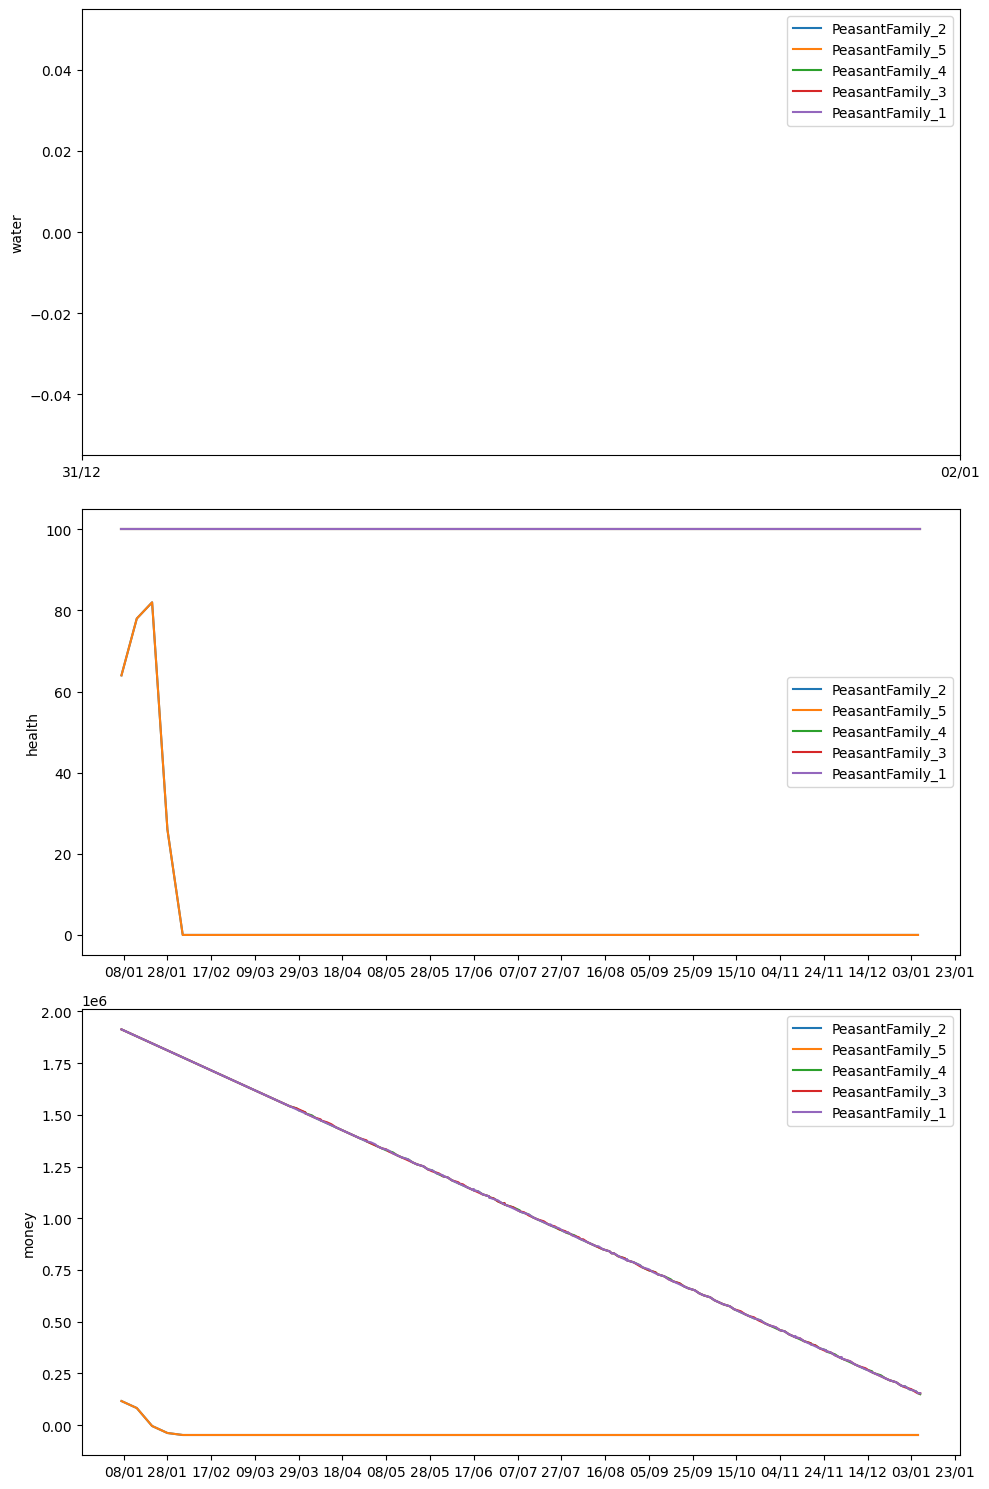

In [124]:
# Asegurando que 'internalCurrentDate' sea una fecha
df['internalCurrentDate'] = pd.to_datetime(df['internalCurrentDate'], dayfirst=True)

# Convirtiendo las columnas a formato numérico
df['water'] = pd.to_numeric(df['water'], errors='coerce')
df['health'] = pd.to_numeric(df['health'], errors='coerce')
df['money'] = pd.to_numeric(df['money'], errors='coerce')

# Crear una lista de todos los 'peasantProfile' únicos
profiles = df['peasantProfile'].unique()

# Crear un conjunto de subgráficos (3 filas, 1 columna)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Para cada variable ('water', 'health', 'money'), crear un gráfico de línea por 'peasantProfile'
for ax, column in zip(axs, ['water', 'health', 'money']):
    for profile in profiles:
        df_profile = df[df['peasantProfile'] == profile]
        df_profile = df_profile.sort_values('internalCurrentDate')
        ax.plot(df_profile['internalCurrentDate'], df_profile[column], label=profile)
    ax.set_ylabel(column)
    ax.legend()

    # Configurar el número de fechas a mostrar en el eje x
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

# Ajustar la presentación
plt.tight_layout()
plt.show()
